# Move Classifier Dataset Exploration




## Code
### Imports

In [1]:
import os
import cv2
import json
import numpy as np
from IPython.display import Image 
import pandas as pd
from tqdm import tqdm
from random import randint

### Functions

In [2]:
def showSample(path, startFrame, numFrames):
    for i in range(startFrame, startFrame+numFrames):
        print(path + "/" + str(i) + ".jpg")
        try:
            display(Image(filename=path + "/" + str(i) + ".jpg"))
        except:
            print("Game Finished.")
            break

In [3]:
def gatherData(dataPathList):
    samples = []
    for dataPath in dataPathList:
        for folder in os.listdir(dataPath):
            samples.append(dataPath + folder)

    return samples

### Options

In [4]:
NUMFRAMES = 2
DATAPATHS = ["../assets/datasets/Move Classifier Data/MineRLBasaltFindCave-v0/", 
                            "../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/", 
                            "../assets/datasets/Move Classifier Data/MineRLBasaltCreateVillageAnimalPen-v0/", 
                            "../assets/datasets/Move Classifier Data/MineRLBasaltMakeWaterfall-v0/"]

### Sample From Files

In [5]:
paths = gatherData(DATAPATHS)
path = paths[randint(0, len(paths))]
print("Sampled: ", path)
df = pd.read_csv(path + "/moves.csv")
df.head()

Sampled:  ../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167


,attack,back,forward,jump,left,right,sneak,sprint,use,drop,inventory,ESC,camera1,camera2,startImage,hotbar
0,0,0,1,1,1,0,0,0,0,0,0,0,0.000000,0.615394,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.615394,1,1
2,0,0,1,1,0,0,0,1,0,0,0,0,0.615394,1.609499,2,1
3,0,0,1,0,0,0,0,0,0,0,0,0,-1.609499,3.215369,3,1
4,0,0,1,0,0,0,0,0,0,0,0,0,-1.609499,1.609499,4,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11169 entries, 0 to 11168
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   attack      11169 non-null  int64  
 1   back        11169 non-null  int64  
 2   forward     11169 non-null  int64  
 3   jump        11169 non-null  int64  
 4   left        11169 non-null  int64  
 5   right       11169 non-null  int64  
 6   sneak       11169 non-null  int64  
 7   sprint      11169 non-null  int64  
 8   use         11169 non-null  int64  
 9   drop        11169 non-null  int64  
 10  inventory   11169 non-null  int64  
 11  ESC         11169 non-null  int64  
 12  camera1     11169 non-null  float64
 13  camera2     11169 non-null  float64
 14  startImage  11169 non-null  int64  
 15  hotbar      11169 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 1.4 MB


In [7]:
df.describe()

,attack,back,forward,jump,left,right,sneak,sprint,use,drop,inventory,ESC,camera1,camera2,startImage,hotbar
count,11169.000000,11169.000000,11169.000000,11169.000000,11169.000000,11169.00000,11169.000000,11169.000000,11169.000000,11169.0,11169.000000,11169.0,11169.000000,11169.000000,11169.000000,11169.000000
mean,0.200555,0.041096,0.523861,0.221058,0.061330,0.13627,0.025607,0.259289,0.026233,0.0,0.005909,0.0,0.007448,-0.127644,5584.000000,2.833109
std,0.400434,0.198521,0.499453,0.414978,0.239946,0.34309,0.157966,0.438264,0.159836,0.0,0.076647,0.0,1.943692,2.957507,3224.356913,1.519009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,-10.000000,-10.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2792.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,5584.000000,2.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,8376.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,10.000000,10.000000,11168.000000,9.000000


### Show Sample of Moving Forward

attack            0.0
back              0.0
forward           1.0
jump              0.0
left              0.0
right             0.0
sneak             0.0
sprint            0.0
use               0.0
drop              0.0
inventory         0.0
ESC               0.0
camera1           0.0
camera2           0.0
startImage    10833.0
hotbar            1.0
Name: 10833, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/10833.jpg


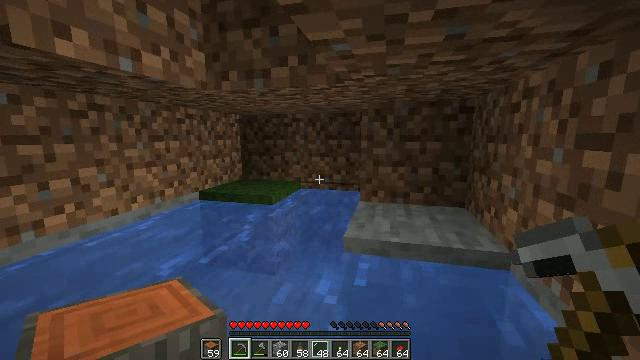

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/10834.jpg


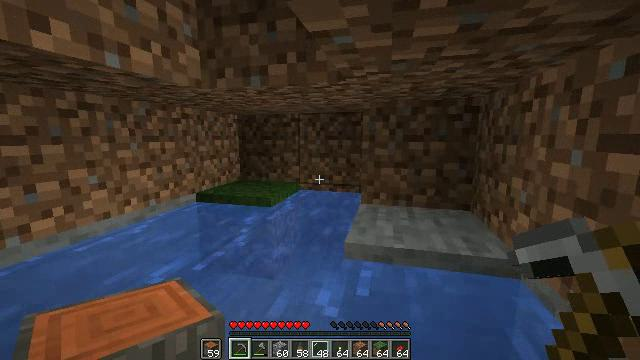

In [8]:
sample = df[df["forward"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Backward

attack           1.0
back             1.0
forward          0.0
jump             1.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    7755.0
hotbar           2.0
Name: 7755, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/7755.jpg


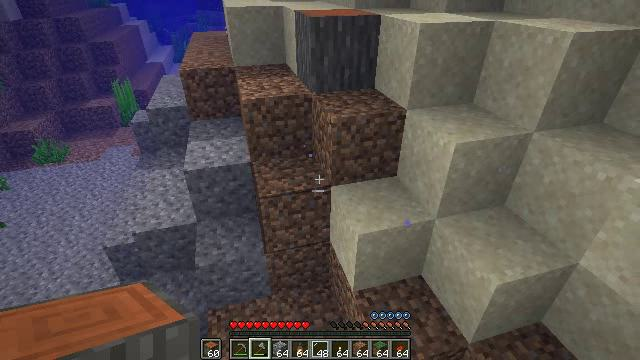

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/7756.jpg


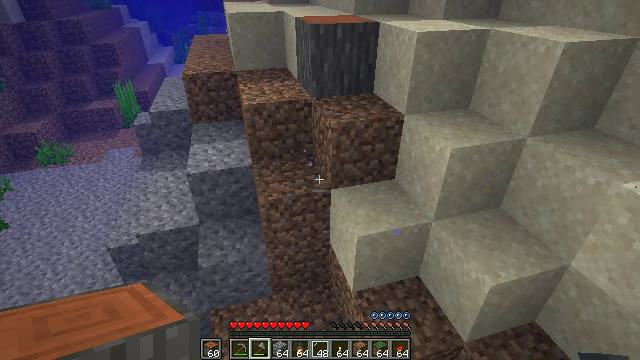

In [9]:
sample = df[df["back"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Left

attack           0.0
back             0.0
forward          0.0
jump             0.0
left             1.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    5876.0
hotbar           2.0
Name: 5876, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/5876.jpg


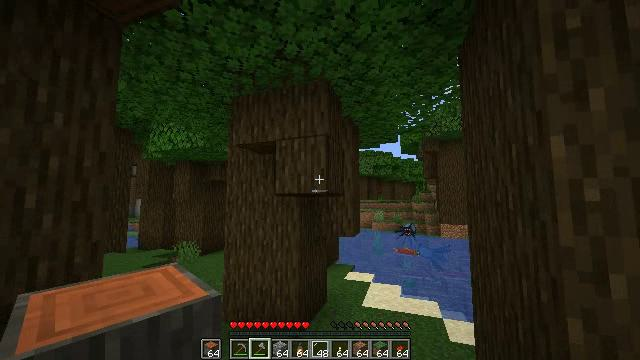

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/5877.jpg


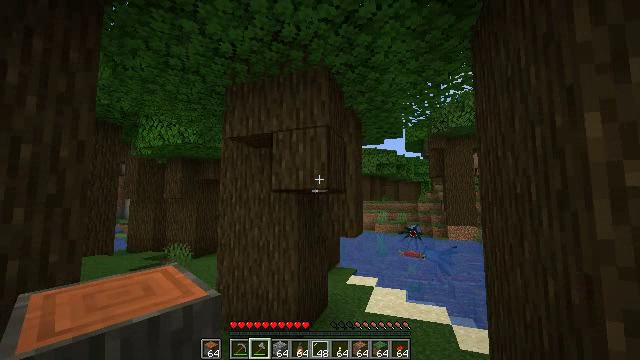

In [10]:
sample = df[df["left"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Right

attack            1.000000
back              0.000000
forward           0.000000
jump              0.000000
left              0.000000
right             1.000000
sneak             0.000000
sprint            0.000000
use               0.000000
drop              0.000000
inventory         0.000000
ESC               0.000000
camera1          -5.809483
camera2           0.615394
startImage    11031.000000
hotbar            1.000000
Name: 11031, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/11031.jpg


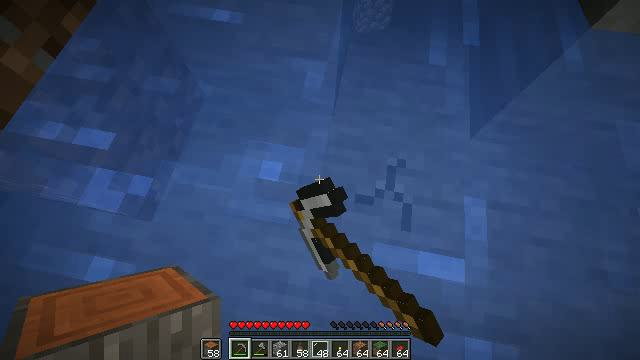

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/11032.jpg


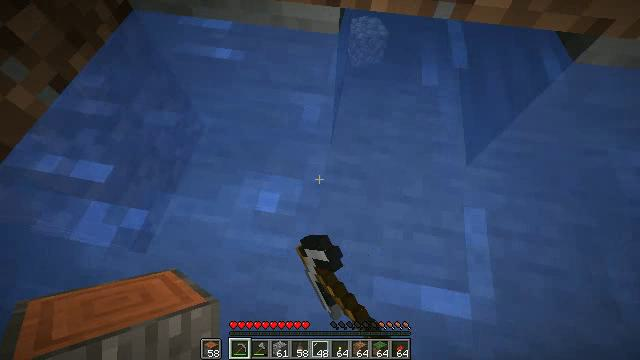

In [11]:
sample = df[df["right"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Sneaking

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            1.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1         -3.215369
camera2          3.215369
startImage    3825.000000
hotbar           2.000000
Name: 3825, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/3825.jpg


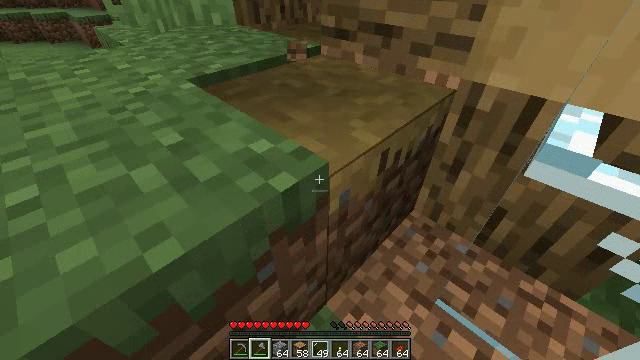

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/3826.jpg


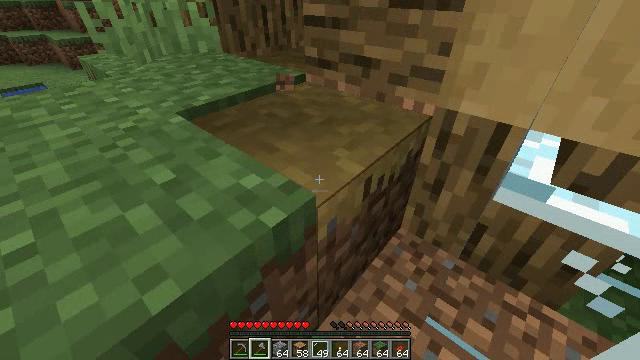

In [12]:
sample = df[df["sneak"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Sprinting

attack           0.000000
back             0.000000
forward          1.000000
jump             1.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           1.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1          0.000000
camera2         -3.215369
startImage    4505.000000
hotbar           4.000000
Name: 4505, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4505.jpg


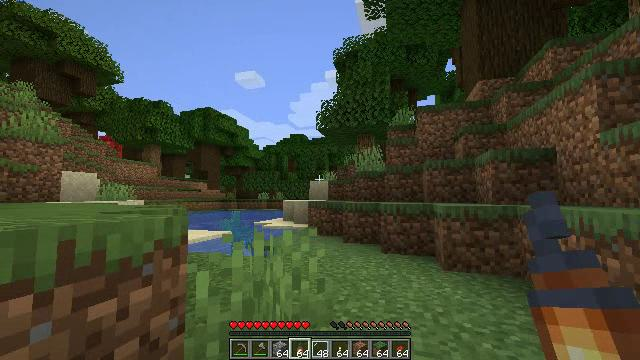

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4506.jpg


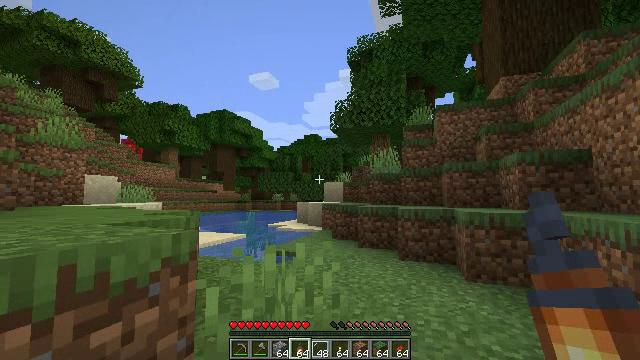

In [13]:
sample = df[df["sprint"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of an Left Click

attack           1.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    4122.0
hotbar           5.0
Name: 4122, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4122.jpg


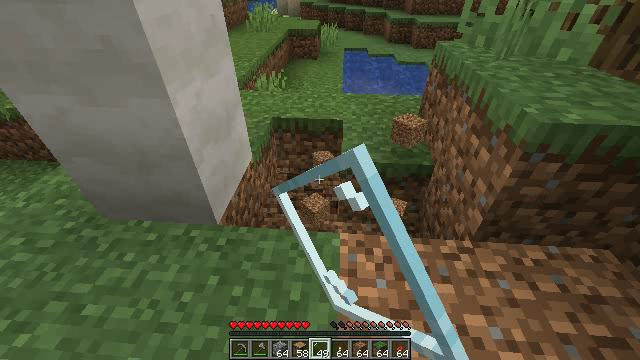

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4123.jpg


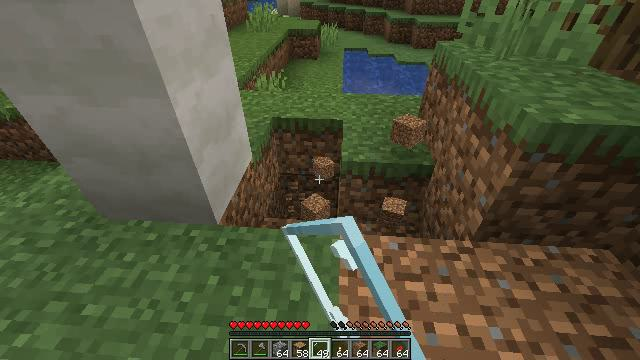

In [14]:
sample = df[df["attack"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Right Click

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           1.000000
use              1.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1         -0.615394
camera2          0.615394
startImage    1195.000000
hotbar           5.000000
Name: 1195, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/1195.jpg


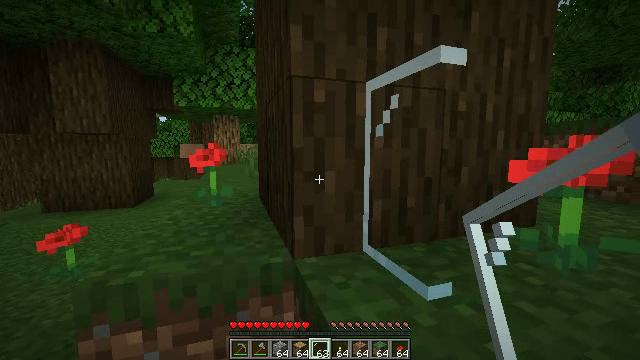

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/1196.jpg


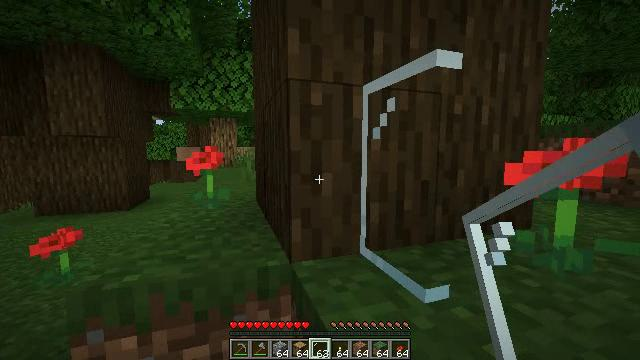

In [15]:
sample = df[df["use"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Dropping Item

In [16]:
sample = df[df["drop"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

ValueError: a must be greater than 0 unless no samples are taken

### Show Sample of Open Inventory

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        1.000000
ESC              0.000000
camera1          0.000000
camera2          1.609499
startImage    4853.000000
hotbar           2.000000
Name: 4853, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4853.jpg


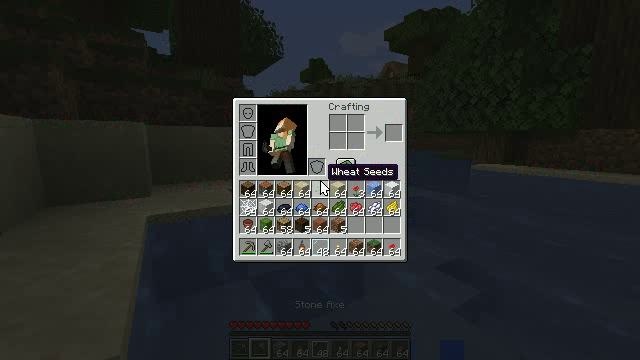

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4854.jpg


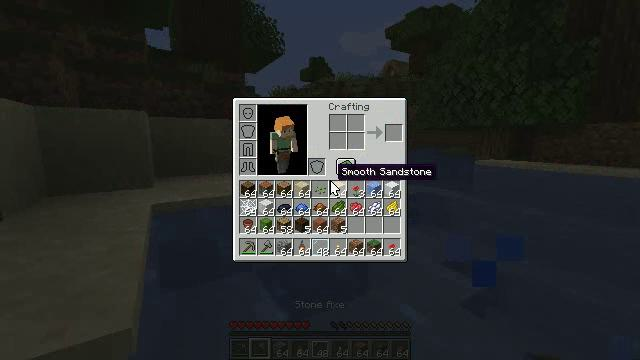

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        1.000000
ESC              0.000000
camera1          0.000000
camera2          5.809483
startImage    2039.000000
hotbar           4.000000
Name: 2039, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/2039.jpg


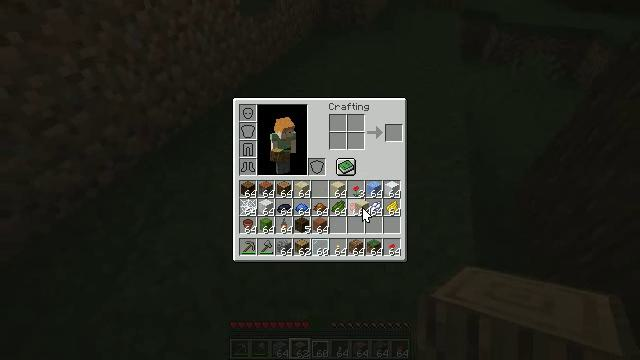

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/2040.jpg


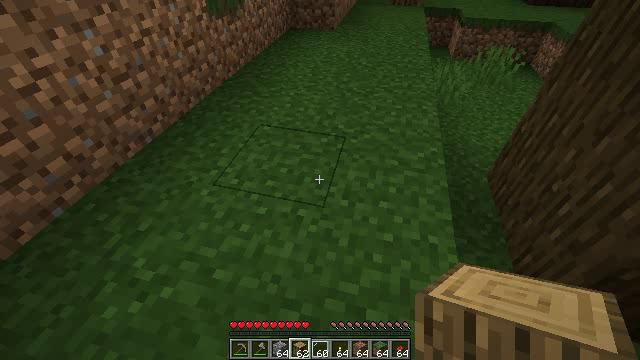

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        1.000000
ESC              0.000000
camera1          0.000000
camera2         -0.615394
startImage    1744.000000
hotbar           5.000000
Name: 1744, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/1744.jpg


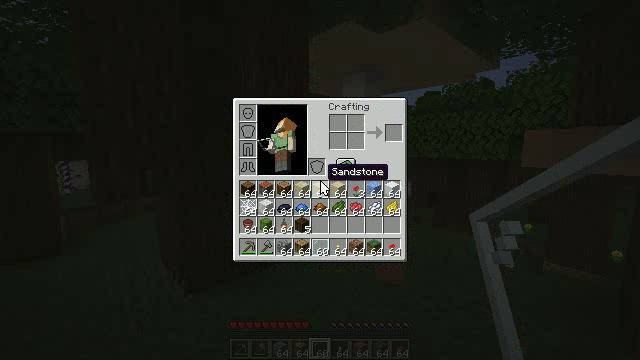

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/1745.jpg


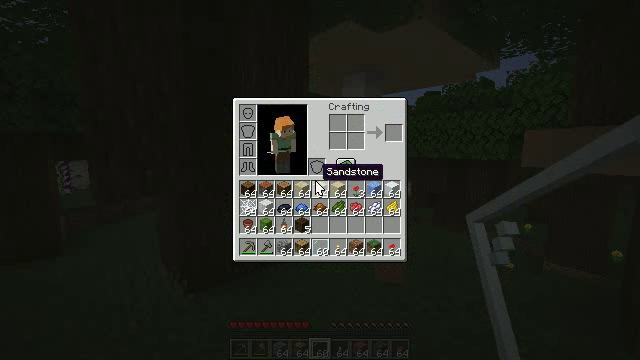

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        1.000000
ESC              0.000000
camera1          0.000000
camera2         -3.215369
startImage    4412.000000
hotbar           9.000000
Name: 4412, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4412.jpg


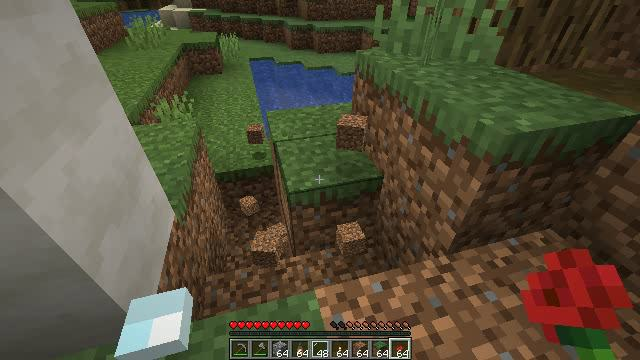

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4413.jpg


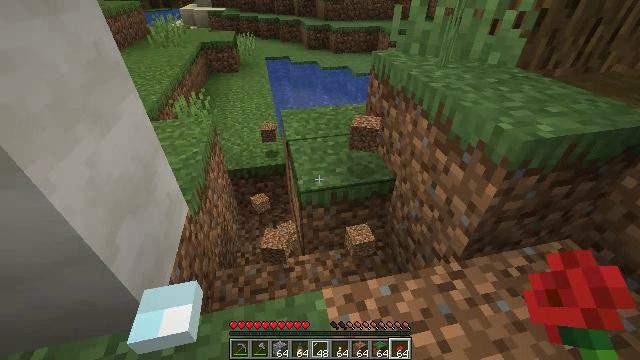

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        1.000000
ESC              0.000000
camera1          1.609499
camera2          0.000000
startImage    4395.000000
hotbar           9.000000
Name: 4395, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4395.jpg


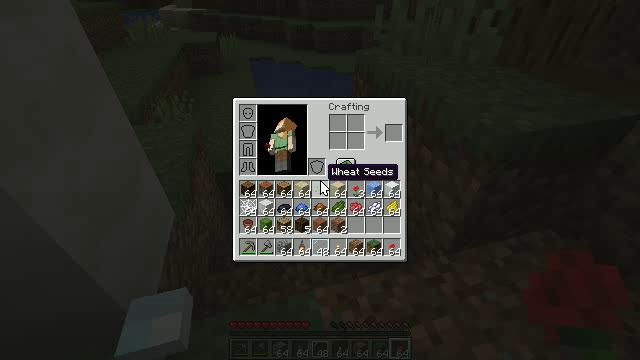

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4396.jpg


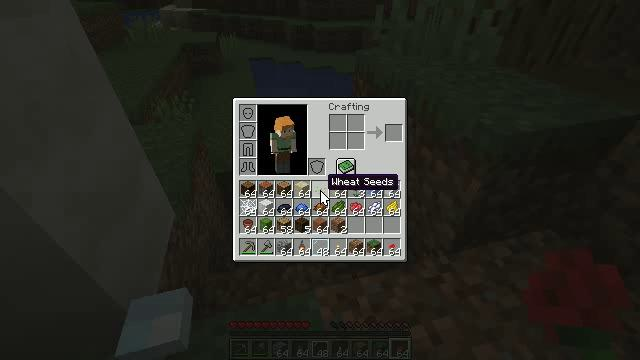

In [21]:
sample = df[df["inventory"]==1].sample(5)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 1

attack            1.0
back              0.0
forward           0.0
jump              0.0
left              0.0
right             0.0
sneak             0.0
sprint            0.0
use               0.0
drop              0.0
inventory         0.0
ESC               0.0
camera1           0.0
camera2           0.0
startImage    10005.0
hotbar            1.0
Name: 10005, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/10005.jpg


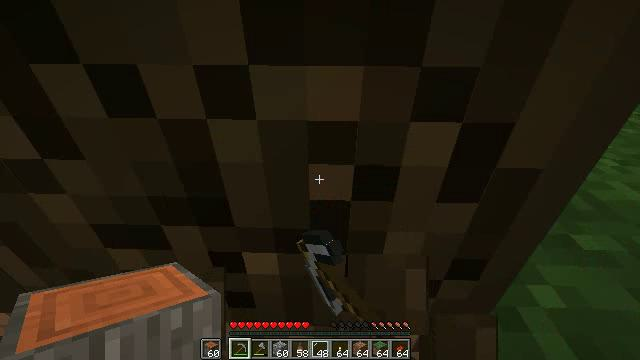

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/10006.jpg


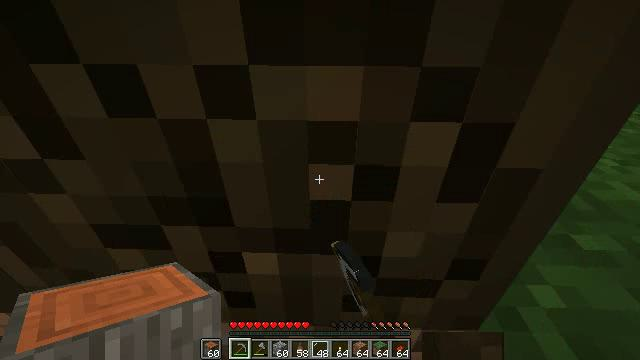

attack           0.0
back             0.0
forward          1.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    8283.0
hotbar           1.0
Name: 8283, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/8283.jpg


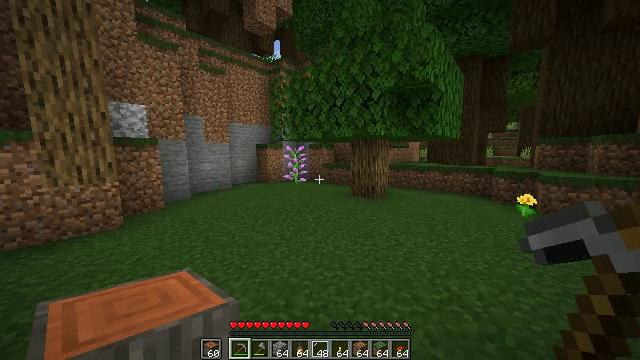

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/8284.jpg


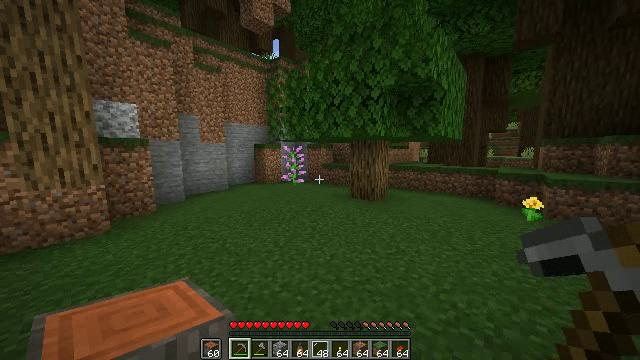

attack         0.0
back           0.0
forward        1.0
jump           0.0
left           0.0
right          0.0
sneak          0.0
sprint         1.0
use            0.0
drop           0.0
inventory      0.0
ESC            0.0
camera1        0.0
camera2        0.0
startImage    77.0
hotbar         1.0
Name: 77, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/77.jpg


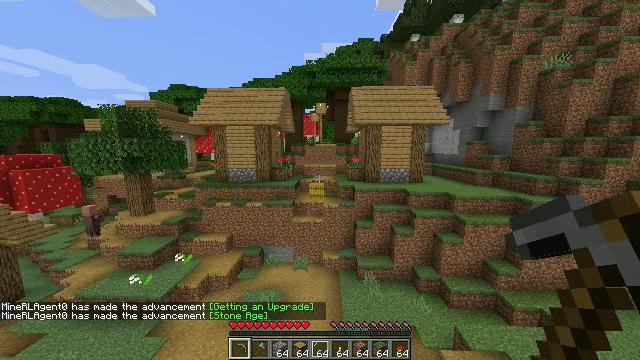

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/78.jpg


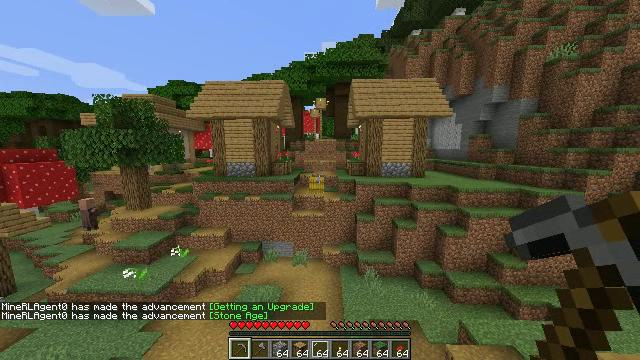

attack            1.000000
back              0.000000
forward           1.000000
jump              0.000000
left              0.000000
right             0.000000
sneak             0.000000
sprint            0.000000
use               0.000000
drop              0.000000
inventory         0.000000
ESC               0.000000
camera1           0.615394
camera2           5.809483
startImage    10919.000000
hotbar            1.000000
Name: 10919, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/10919.jpg


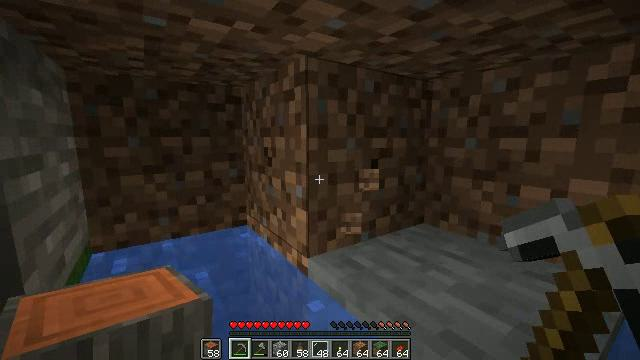

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/10920.jpg


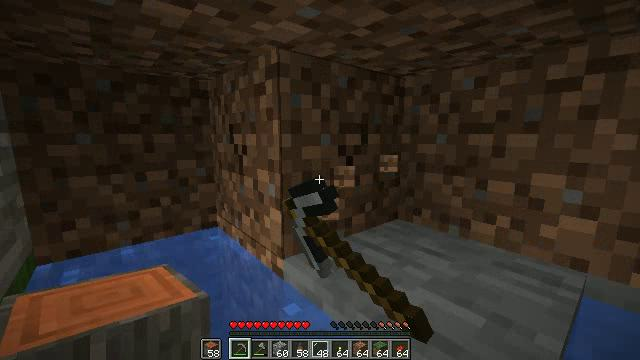

attack            1.0
back              0.0
forward           0.0
jump              0.0
left              0.0
right             0.0
sneak             0.0
sprint            0.0
use               0.0
drop              0.0
inventory         0.0
ESC               0.0
camera1           0.0
camera2           0.0
startImage    11001.0
hotbar            1.0
Name: 11001, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/11001.jpg


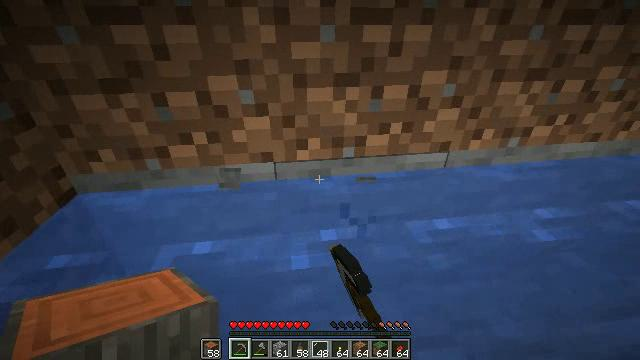

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/11002.jpg


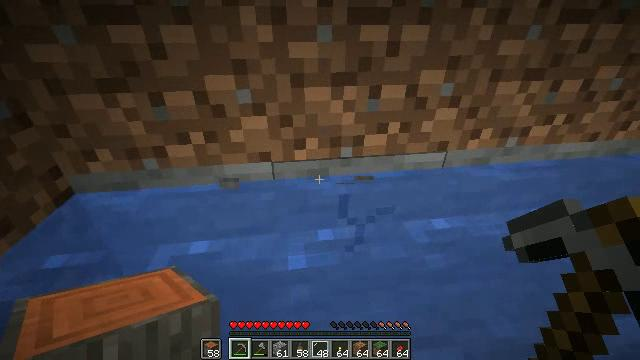

In [18]:
sample = df[df["hotbar"]==1].sample(5)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 2

attack           1.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    6914.0
hotbar           2.0
Name: 6914, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/6914.jpg


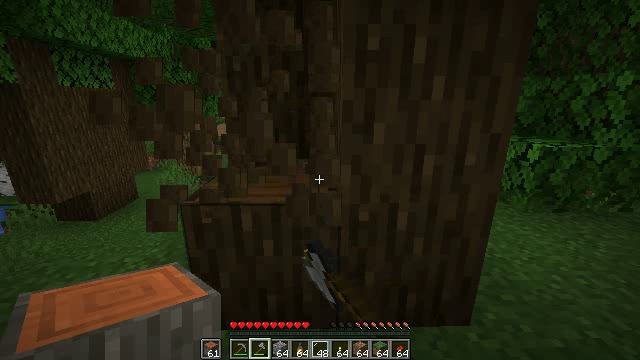

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/6915.jpg


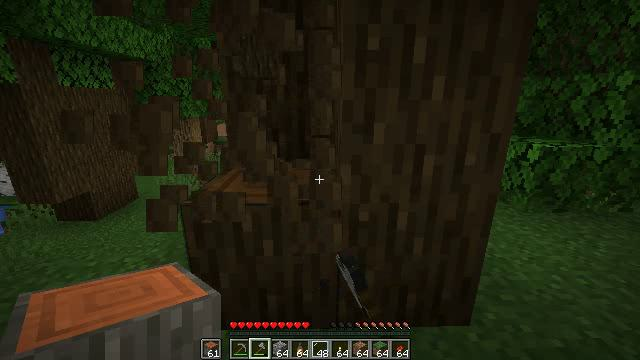

attack           0.0
back             0.0
forward          0.0
jump             0.0
left             1.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    6204.0
hotbar           2.0
Name: 6204, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/6204.jpg


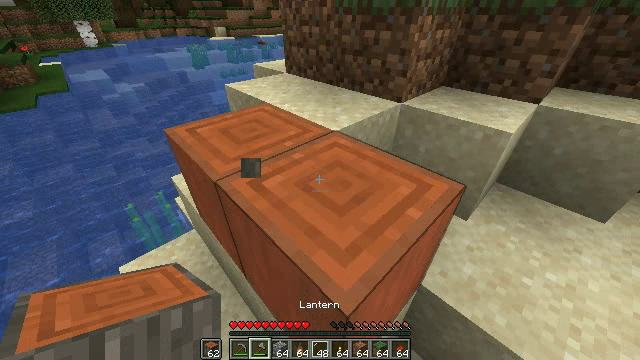

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/6205.jpg


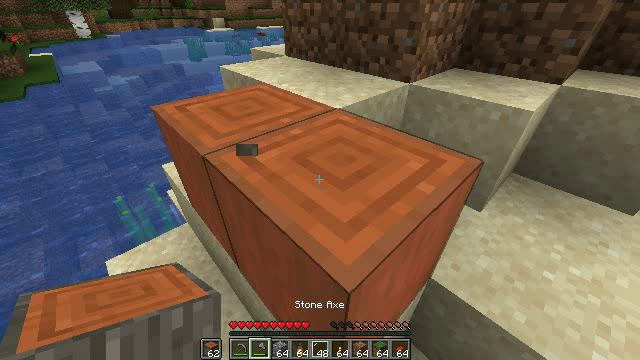

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1         -0.615394
camera2          0.000000
startImage    5160.000000
hotbar           2.000000
Name: 5160, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/5160.jpg


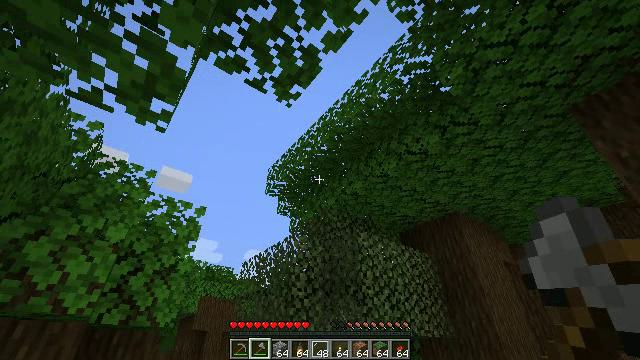

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/5161.jpg


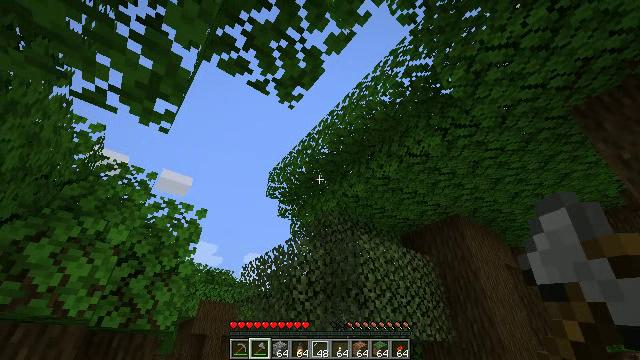

attack           0.0
back             0.0
forward          1.0
jump             0.0
left             0.0
right            1.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    5098.0
hotbar           2.0
Name: 5098, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/5098.jpg


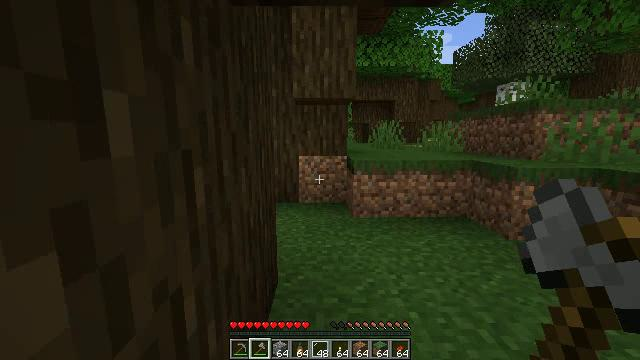

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/5099.jpg


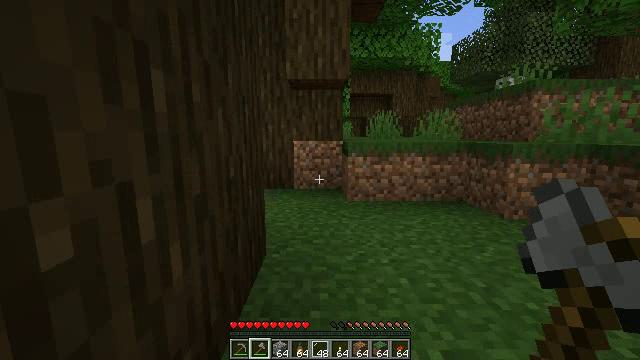

attack           0.000000
back             0.000000
forward          1.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1         -0.615394
camera2          0.000000
startImage    5154.000000
hotbar           2.000000
Name: 5154, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/5154.jpg


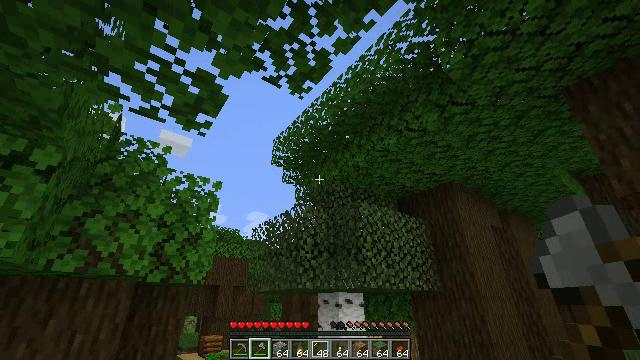

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/5155.jpg


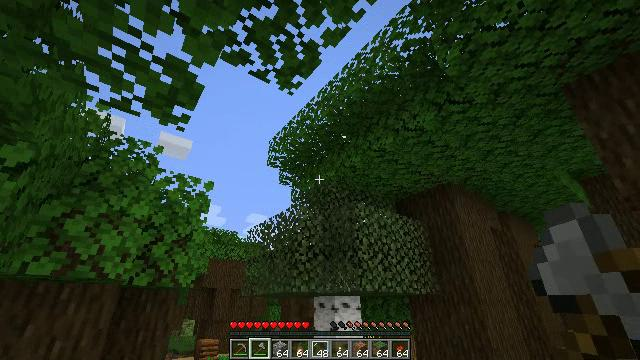

In [19]:
sample = df[df["hotbar"]==2].sample(5)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 3

attack           0.000000
back             0.000000
forward          1.000000
jump             0.000000
left             0.000000
right            1.000000
sneak            0.000000
sprint           1.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1          0.000000
camera2          5.809483
startImage    9030.000000
hotbar           3.000000
Name: 9030, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/9030.jpg


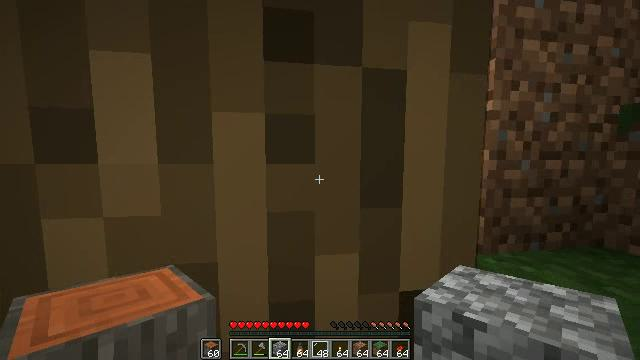

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/9031.jpg


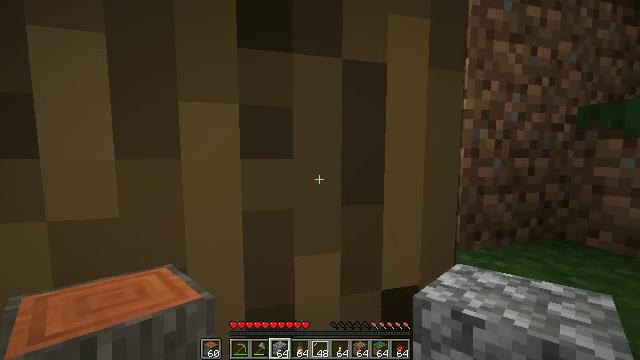

attack           0.0
back             0.0
forward          1.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           1.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    9231.0
hotbar           3.0
Name: 9231, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/9231.jpg


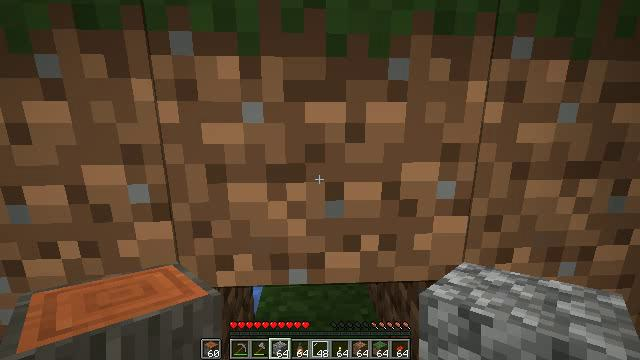

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/9232.jpg


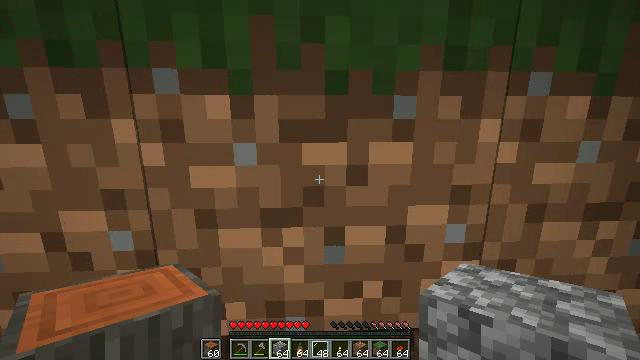

attack           0.000000
back             0.000000
forward          1.000000
jump             0.000000
left             0.000000
right            1.000000
sneak            0.000000
sprint           1.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1          0.615394
camera2          1.609499
startImage    9103.000000
hotbar           3.000000
Name: 9103, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/9103.jpg


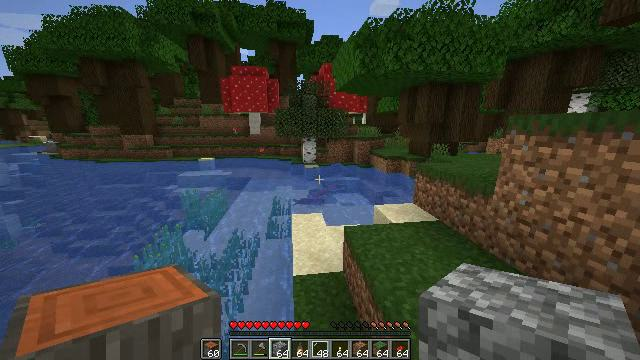

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/9104.jpg


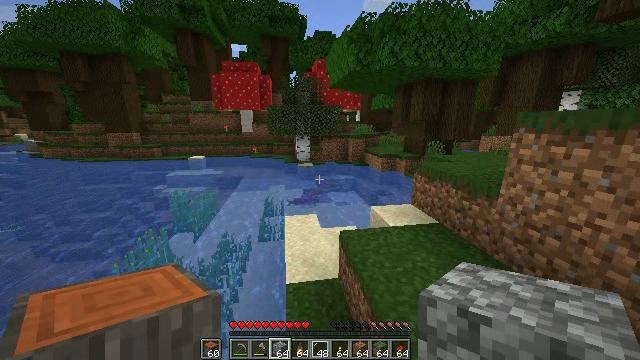

attack           0.000000
back             0.000000
forward          1.000000
jump             0.000000
left             0.000000
right            1.000000
sneak            0.000000
sprint           1.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1          3.215369
camera2         10.000000
startImage    9037.000000
hotbar           3.000000
Name: 9037, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/9037.jpg


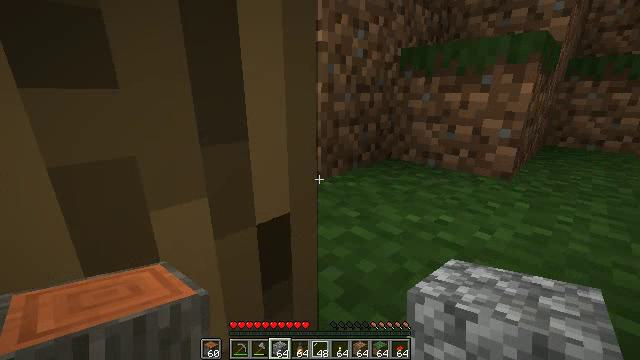

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/9038.jpg


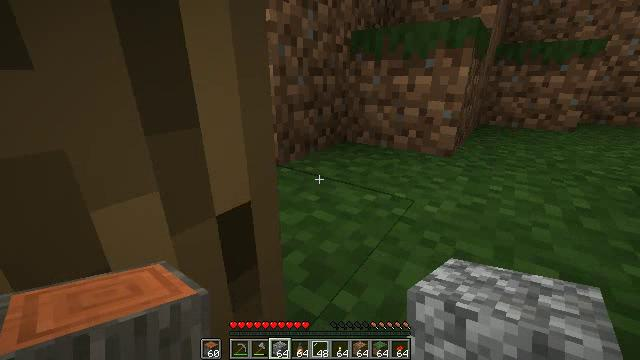

attack           0.0
back             0.0
forward          1.0
jump             0.0
left             0.0
right            1.0
sneak            0.0
sprint           1.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    9168.0
hotbar           3.0
Name: 9168, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/9168.jpg


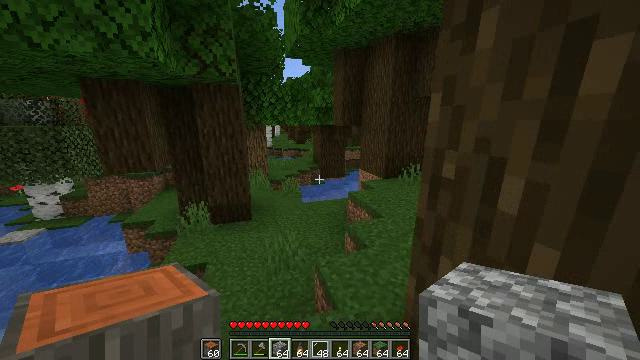

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/9169.jpg


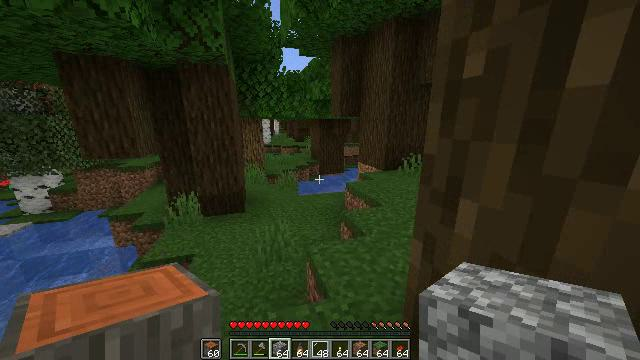

In [20]:
sample = df[df["hotbar"]==3].sample(5)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 4

attack           0.000000
back             0.000000
forward          0.000000
jump             1.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1          3.215369
camera2          0.000000
startImage    9467.000000
hotbar           4.000000
Name: 9467, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/9467.jpg


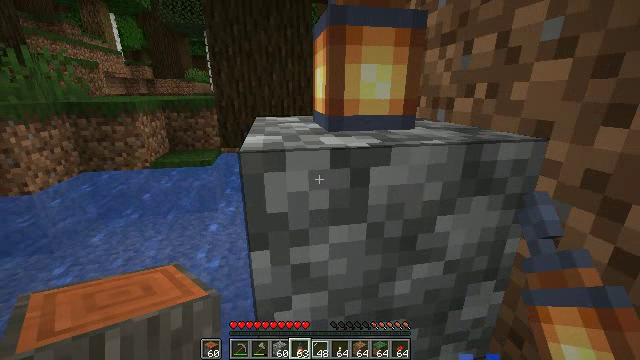

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/9468.jpg


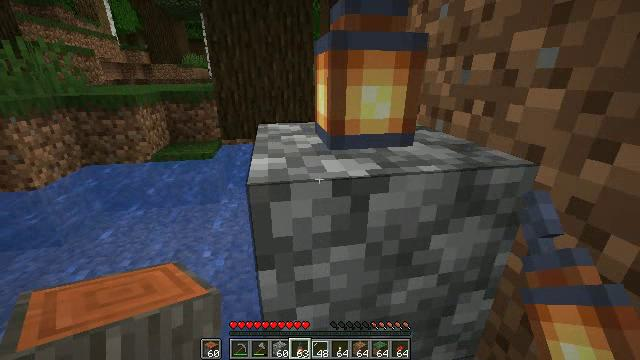

In [22]:
sample = df[df["hotbar"]==4].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 5

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             1.000000
right            0.000000
sneak            0.000000
sprint           1.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1          0.000000
camera2          5.809483
startImage    8728.000000
hotbar           5.000000
Name: 8728, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/8728.jpg


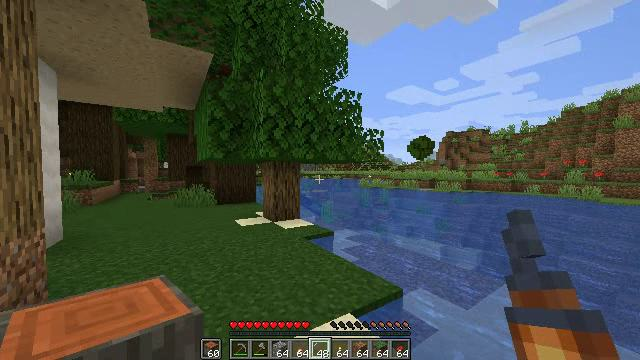

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/8729.jpg


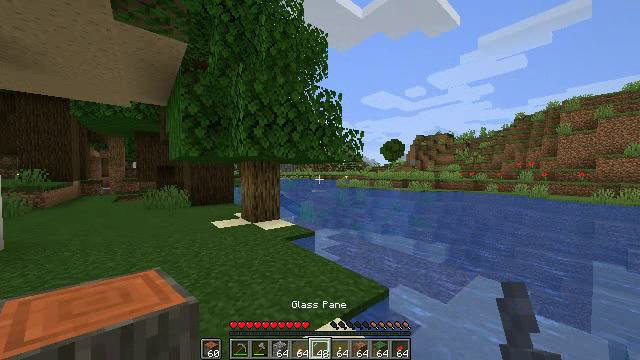

In [23]:
sample = df[df["hotbar"]==5].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 6

attack           0.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    3053.0
hotbar           6.0
Name: 3053, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/3053.jpg


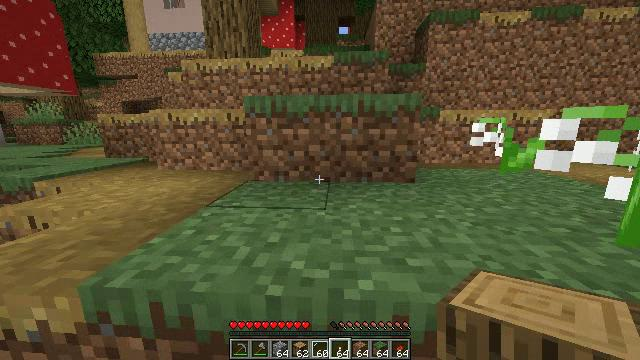

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/3054.jpg


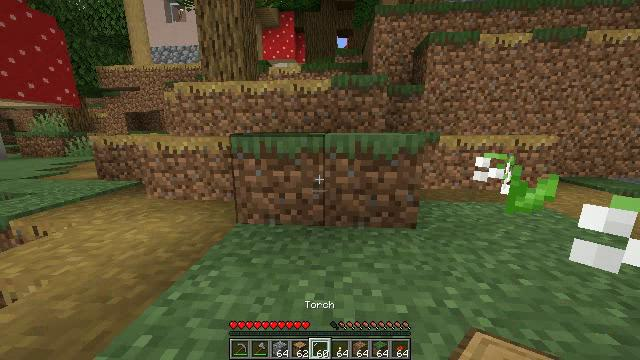

In [24]:
sample = df[df["hotbar"]==6].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)
    

### Show Sample of Changing Hotbar to 7

attack           0.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    4353.0
hotbar           7.0
Name: 4353, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4353.jpg


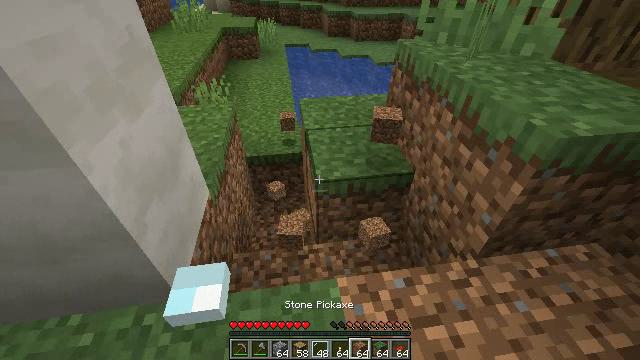

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4354.jpg


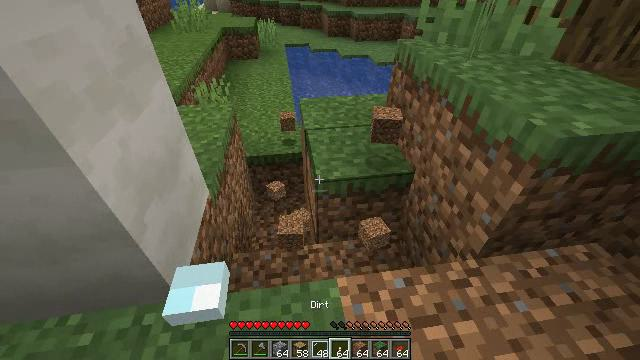

In [25]:
sample = df[df["hotbar"]==7].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 8

In [26]:
sample = df[df["hotbar"]==8].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

ValueError: a must be greater than 0 unless no samples are taken

### Show Sample of Changing Hotbar to 9

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        0.000000
ESC              0.000000
camera1          0.615394
camera2         -0.615394
startImage    4376.000000
hotbar           9.000000
Name: 4376, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4376.jpg


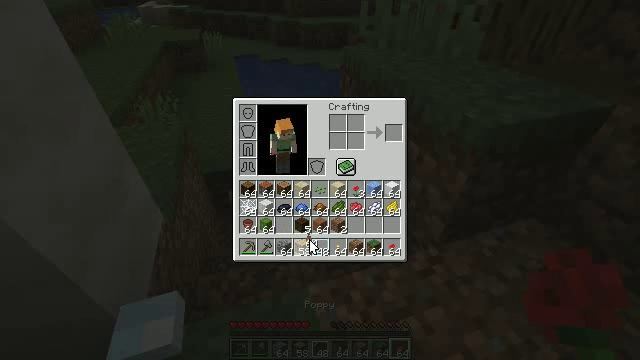

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T22-10-08-724167/4377.jpg


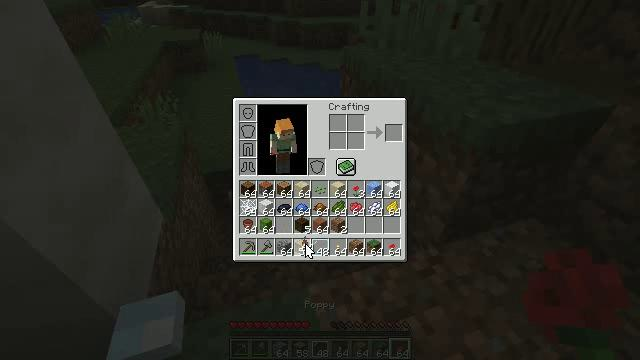

In [27]:
sample = df[df["hotbar"]==9].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Mouse (Y-Axis)

In [ ]:
sample = df[df["camera1"]!=0].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Mouse (X-Axis)

In [ ]:
sample = df[df["camera2"]!=0].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)